In [1]:
from algotrading.backtesting.strategies import StrategyFactory
from algotrading.providers.api import EIProvider
from algotrading.common.trade import Timeframe
from algotrading.common.symbol import Symbol
from algotrading.backtesting.strategies import ContrarianParams

contrarian = StrategyFactory.create_contrarian(
    provider_name   = EIProvider.PROVIDER_OANDA,
    symbol          = Symbol.EUR_USD,
    start_date      = "2023-01-01",
    end_date        = "2023-03-31",
    timeframe       = Timeframe.HOUR_4,
    params          = ContrarianParams(
        balance = 10000,
        volume  = 0.1,
        window = 3
    ),
    force_download_ticker = False
)

contrarian.run()

In [2]:
contrarian.get_report(do_print=True)

BACKTESTING REPORT
1. Summary
    ◦ Ticks: 385
    ◦ Initial Balance: 10000
    ◦ Final Balance: 9460.7
    ◦ Net Profit: -539.3
    ◦ Gross Profit: 1007.0
    ◦ Gross Loss: -1546.3
2. Drawdown
   Balance Drawdown
    ◦ Abs: 539.3, Max: 798.3, Rel: 7.78
   Equity Drawdown
    ◦ Abs: 540.3, Max: 799.3, Rel: 7.79
3. Measurement
    ◦ Profit Factor: 0.65
    ◦ Recovery Factor: -0.67
    ◦ Expected Payoff: -6.66
    ◦ Margin Level: 8706.65
4. Trade
    ◦ All Position:
       ◦ Total: 81, Won: 41, Lost: 40
    ◦ Long Position:
       ◦ Total: 38, Won: 21, Lost: 17
    ◦ Short Position:
       ◦ Total: 43, Won: 20, Lost: 23
    ◦ Total Orders: 162
    ◦ Total Deals: 162
    ◦ Largest Profit: 80.2
    ◦ Largest Loss: -136.0
    ◦ Average Profit: 24.56
    ◦ Average Loss: -38.66
    ◦ Max Consecutive Wins:
       ◦ Total: 6, Profit: 97.3
       ◦ Average: 2.05
    ◦ Max Consecutive Losses:
       ◦ Total: 6, Profit: -406.0
       ◦ Average: 1.9



BacktestingReport(summary=SummaryReport(ticks=385, initial_balance=10000, final_balance=9460.700000000004, net_profit=-539.2999999999934, gross_profit=1007.0000000000068, gross_loss=-1546.3000000000004), balance_drawdown=DrawdownReport(abs=539.2999999999956, max=798.2999999999902, rel=7.781460181304128), equity_drawdown=DrawdownReport(abs=540.2999999999938, max=799.2999999999884, rel=7.791207720050577), measurement=MeasurementReport(profit_factor=0.6512319730970747, recovery_factor=-0.6747153759539612, expected_payoff=-6.658024691357943, margin_level=8706.645205794437), trade=TradeReport(all_position=PositionReport(total=81, won=41, lost=40), long_position=PositionReport(total=38, won=21, lost=17), short_position=PositionReport(total=43, won=20, lost=23), total_orders=162, total_deals=162, largest_profit=80.20000000000138, largest_loss=-136.00000000000057, average_profit=24.560975609756262, average_loss=-38.65750000000001, max_consecutive_wins=[6, 97.29999999999797], max_consecutive_lo

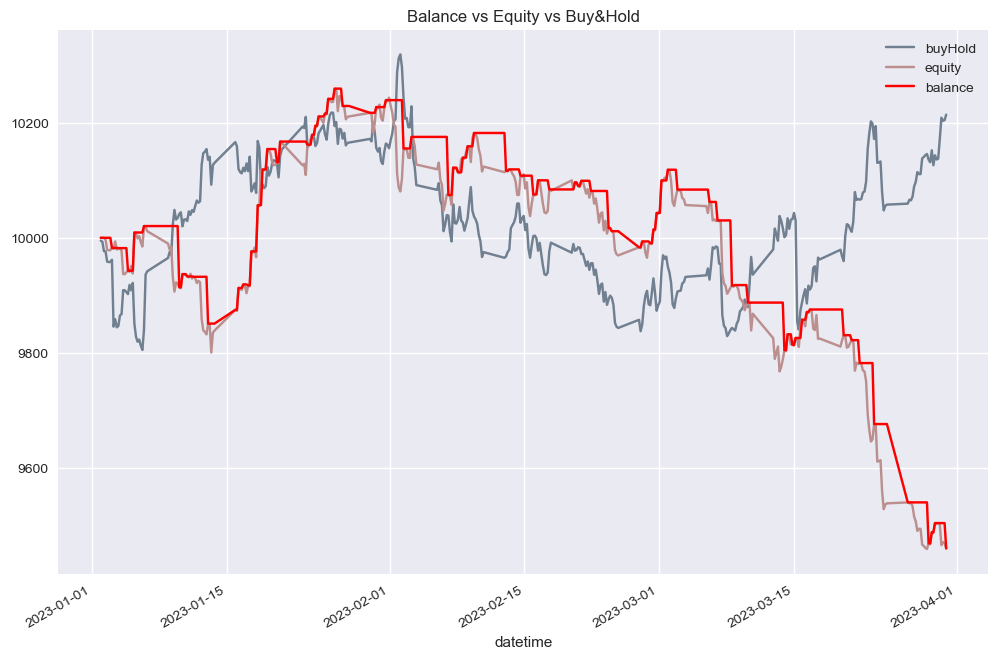

In [3]:
contrarian.plot_equity_records()

In [4]:
contrarian.get_equity_records()

,balance,rProfit,equity,fProfit,marginUsed,freeMargin,marginLevel,marginHealth,buyHold
datetime,,,,,,,,,
2023-01-01 22:00:00+00:00,10000.0,0.0,10000.0,0.0,0.000,10000.000,0.000000,OK,9995.0
2023-01-02 02:00:00+00:00,10000.0,0.0,10000.0,0.0,0.000,10000.000,0.000000,OK,9993.3
2023-01-02 06:00:00+00:00,10000.0,0.0,10000.0,0.0,0.000,10000.000,0.000000,OK,9976.9
2023-01-02 10:00:00+00:00,10000.0,0.0,9996.9,-3.1,106.805,9890.095,9359.955058,OK,9976.4
2023-01-02 14:00:00+00:00,10000.0,0.0,9979.3,-20.7,106.805,9872.495,9343.476429,OK,9958.8
...,...,...,...,...,...,...,...,...,...
2023-03-30 05:00:00+00:00,9504.6,-495.4,9503.0,-1.6,108.725,9394.275,8740.400092,OK,10171.5
2023-03-30 09:00:00+00:00,9504.6,-495.4,9466.3,-38.3,108.725,9357.575,8706.645206,OK,10208.5
2023-03-30 13:00:00+00:00,9504.6,-495.4,9471.5,-33.1,108.725,9362.775,8711.427914,OK,10203.2


In [5]:
contrarian.account_ledger()

,transaction,currency,amount,balance,message
datetime,,,,,
2023-01-01 22:00:00+00:00,DEPOSIT,USD,10000.000,10000.000,Initial Deposit
2023-01-02 10:00:00+00:00,MARGIN_LOCK,USD,-106.805,9893.195,None
2023-01-03 02:00:00+00:00,MARGIN_RELEASE,USD,106.805,10000.000,None
2023-01-03 02:00:00+00:00,LOSS_TRADE,USD,-17.600,9982.400,None
2023-01-03 06:00:00+00:00,MARGIN_LOCK,USD,-105.483,9876.917,None
...,...,...,...,...,...
2023-03-30 01:00:00+00:00,MARGIN_RELEASE,USD,108.385,9504.700,None
2023-03-30 01:00:00+00:00,LOSS_TRADE,USD,-0.100,9504.600,None
2023-03-30 05:00:00+00:00,MARGIN_LOCK,USD,-108.725,9395.875,None


In [6]:
contrarian.get_positions()

,symbol,openDatetime,closeDatetime,type,volume,comment,status,margin,profit
id,,,,,,,,,
80,EUR_USD,2023-03-30 05:00:00+00:00,2023-03-30 21:00:00+00:00,SHORT_SELL,0.1,None,CLOSE,108.725,-43.9
79,EUR_USD,2023-03-29 21:00:00+00:00,2023-03-30 01:00:00+00:00,LONG_BUY,0.1,None,CLOSE,108.385,-0.1
78,EUR_USD,2023-03-29 13:00:00+00:00,2023-03-29 17:00:00+00:00,LONG_BUY,0.1,None,CLOSE,108.283,15.9
77,EUR_USD,2023-03-29 05:00:00+00:00,2023-03-29 09:00:00+00:00,LONG_BUY,0.1,None,CLOSE,108.337,19.3
76,EUR_USD,2023-03-27 01:00:00+00:00,2023-03-29 01:00:00+00:00,SHORT_SELL,0.1,None,CLOSE,107.671,-71.1
...,...,...,...,...,...,...,...,...,...
4,EUR_USD,2023-01-05 14:00:00+00:00,2023-01-06 10:00:00+00:00,LONG_BUY,0.1,None,CLOSE,105.307,11.2
3,EUR_USD,2023-01-04 22:00:00+00:00,2023-01-05 10:00:00+00:00,SHORT_SELL,0.1,None,CLOSE,106.193,66.3
2,EUR_USD,2023-01-03 22:00:00+00:00,2023-01-04 18:00:00+00:00,SHORT_SELL,0.1,None,CLOSE,105.662,-39.2


In [7]:
contrarian.get_data()

,ask,bid,mid,volume,digit,spread,returns,rolling_returns
time,,,,,,,,
2023-01-01 22:00:00+00:00,1.07010,1.06960,1.06985,174,5,50,NaN,NaN
2023-01-02 02:00:00+00:00,1.06993,1.06943,1.06968,598,5,50,-0.000159,NaN
2023-01-02 06:00:00+00:00,1.06803,1.06779,1.06791,7814,5,24,-0.001656,NaN
2023-01-02 10:00:00+00:00,1.06805,1.06774,1.06790,5783,5,31,-0.000009,-0.000608
2023-01-02 14:00:00+00:00,1.06623,1.06598,1.06610,7428,5,25,-0.001687,-0.001117
...,...,...,...,...,...,...,...,...
2023-03-30 05:00:00+00:00,1.08741,1.08725,1.08733,21737,5,16,0.003150,0.000859
2023-03-30 09:00:00+00:00,1.09108,1.09095,1.09102,19839,5,13,0.003388,0.002219
2023-03-30 13:00:00+00:00,1.09056,1.09042,1.09049,25189,5,14,-0.000486,0.002017


In [8]:
contrarian.get_orders()

,symbol,datetime,type,direction,volume,price
id,,,,,,
160,EUR_USD,2023-03-30 05:00:00+00:00,MARKET_SELL,MARKET_IN,0.1,1.08725
161,EUR_USD,2023-03-30 21:00:00+00:00,MARKET_BUY,MARKET_OUT,0.1,1.09164
158,EUR_USD,2023-03-29 21:00:00+00:00,MARKET_BUY,MARKET_IN,0.1,1.08385
159,EUR_USD,2023-03-30 01:00:00+00:00,MARKET_SELL,MARKET_OUT,0.1,1.08384
156,EUR_USD,2023-03-29 13:00:00+00:00,MARKET_BUY,MARKET_IN,0.1,1.08283
...,...,...,...,...,...,...
5,EUR_USD,2023-01-04 18:00:00+00:00,MARKET_BUY,MARKET_OUT,0.1,1.06054
2,EUR_USD,2023-01-03 06:00:00+00:00,MARKET_BUY,MARKET_IN,0.1,1.05483
3,EUR_USD,2023-01-03 18:00:00+00:00,MARKET_SELL,MARKET_OUT,0.1,1.05480


In [9]:
contrarian.get_deals()

,symbol,datetime,type,volume,price
id,,,,,
160,EUR_USD,2023-03-30 05:00:00+00:00,SELL,0.1,1.08725
161,EUR_USD,2023-03-30 21:00:00+00:00,BUY,0.1,1.09164
158,EUR_USD,2023-03-29 21:00:00+00:00,BUY,0.1,1.08385
159,EUR_USD,2023-03-30 01:00:00+00:00,SELL,0.1,1.08384
156,EUR_USD,2023-03-29 13:00:00+00:00,BUY,0.1,1.08283
...,...,...,...,...,...
5,EUR_USD,2023-01-04 18:00:00+00:00,BUY,0.1,1.06054
2,EUR_USD,2023-01-03 06:00:00+00:00,BUY,0.1,1.05483
3,EUR_USD,2023-01-03 18:00:00+00:00,SELL,0.1,1.05480
